In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

df = pd.read_csv("D:\EDGE AI\Edge-AI-1\Data\cleaned_telemetry_data.csv")

# Select only numerical columns for training
features = ["temp", "humidity", "co", "lpg", "smoke"]
data = df[features].values

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Creating sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps][0])
    return np.array(X), np.array(y)

# Define time steps
TIME_STEPS = 10
X, y = create_sequences(data_scaled, TIME_STEPS)

# Splitting testing and training sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Implementing Architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=32)

model.save("lstm_model.h5")


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,701 (127.74 KB)

 Trainable params: 32,701 (127.74 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.0091
Epoch 2/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0054
Epoch 3/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.0053
Epoch 4/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.0052
Epoch 5/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0051
Epoch 6/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0051
Epoch 7/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0051
Epoch 8/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0050
Epoch 9/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0050
Epoch 10/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0050


Model loaded successfully!
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0073
Test Loss: 0.008835707791149616
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


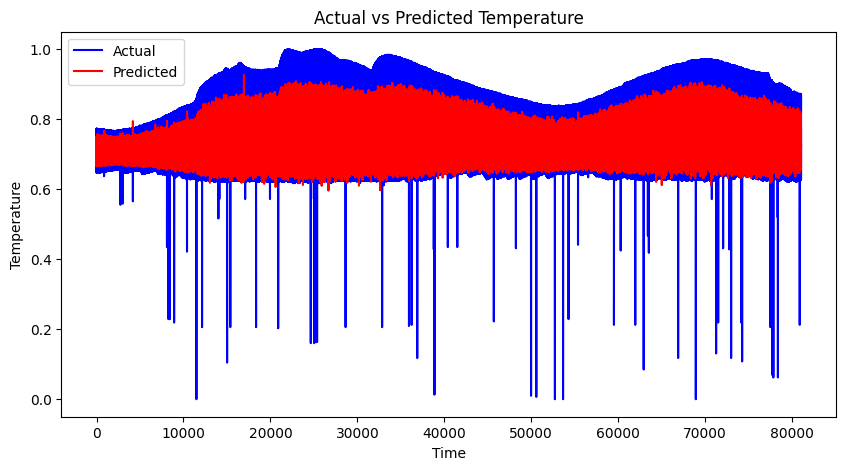

In [3]:
# Load model
loaded_model = load_model("lstm_model.h5")
print("Model loaded successfully!")

# Evaluate model
test_loss = loaded_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
y_pred = loaded_model.predict(X_test)

# Reverse normalization for better interpretation
y_test_original = scaler.inverse_transform(np.column_stack([y_test, np.zeros((len(y_test), 4))]))[:, 0]
y_pred_original = scaler.inverse_transform(np.column_stack([y_pred.flatten(), np.zeros((len(y_pred), 4))]))[:, 0]

# Plot actual vs predicted temperature
plt.figure(figsize=(10,5))
plt.plot(y_test_original, label="Actual", color='blue')
plt.plot(y_pred_original, label="Predicted", color='red')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature")
plt.legend()
plt.show()